#  Heart Disease Dataset Exploration.ipynb
#  Dataset: cardio_train.csv
#  Contains EDA + Graph Visualization + Explore Functions

# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [2]:
df = pd.read_csv("cardio_train.csv", sep=";")
df = df.drop(columns=["id"])

# Overview of Dataset

In [3]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])

Rows: 70000 Columns: 12


# Basic Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


# Column names from dateset

In [5]:
df.columns.tolist()

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

# Datatypes

In [6]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

# first 5 rows

In [7]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Missing value count

In [8]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Unique Values in Each Column

In [9]:
df.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

# Summary Statistics

In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# age count

In [11]:
df['age_years'] = df['age'] // 365
print("Min: ",df['age_years'].min())
print("Max: ",df['age_years'].max())
print("Mean: ",df['age_years'].mean())

Min:  29
Max:  64
Mean:  52.840671428571426


# BMI

In [12]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
print("Min: ",df['bmi'].min())
print("Max: ",df['bmi'].max())
print("Mean: ",df['bmi'].mean())

Min:  3.471783865673526
Max:  298.6666666666667
Mean:  27.55651255127886


# Histogram

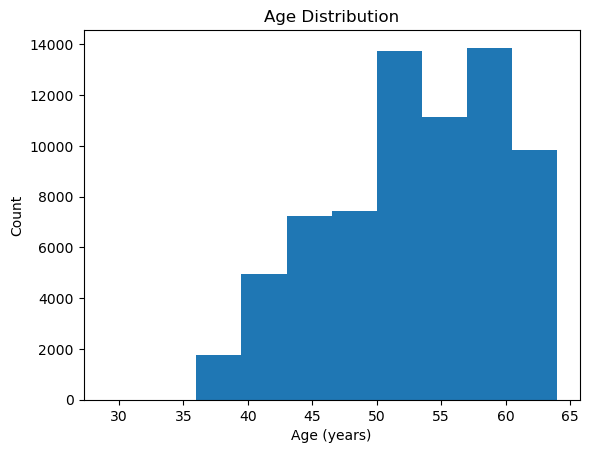

In [13]:
plt.hist(df['age_years'])
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

# Duplicate check

In [14]:
 df.duplicated().sum()

24

# remove duplicate data

In [15]:
df.drop_duplicates()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


# BMI Distribution

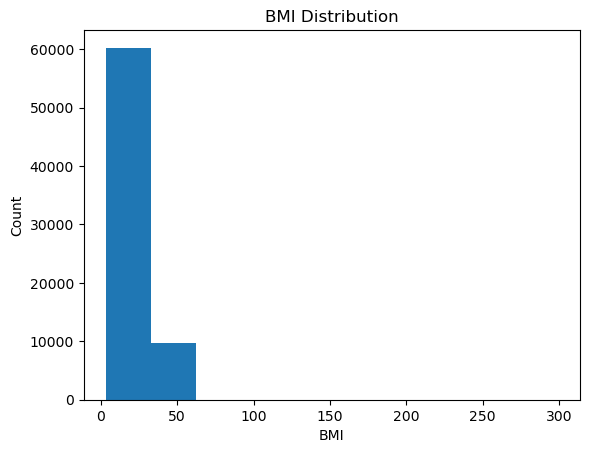

In [16]:
plt.hist(df['bmi'])
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# Heart Disease Count

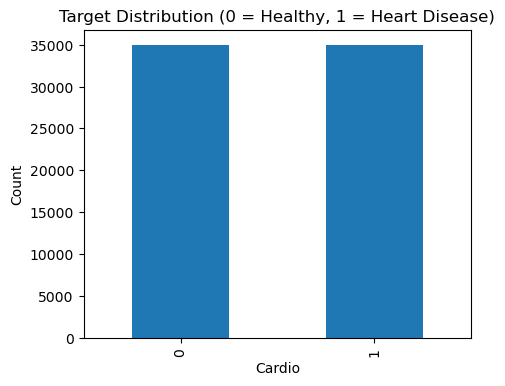

In [17]:
plt.figure(figsize=(5,4))
df['cardio'].value_counts().plot(kind='bar')
plt.title("Target Distribution (0 = Healthy, 1 = Heart Disease)")
plt.xlabel("Cardio")
plt.ylabel("Count")
plt.show()

# KDE Plot for each column

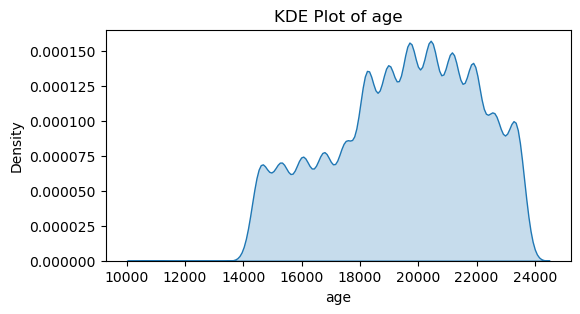

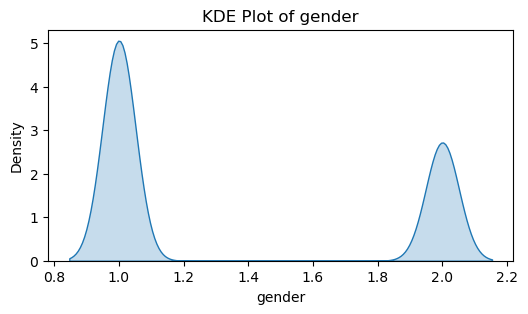

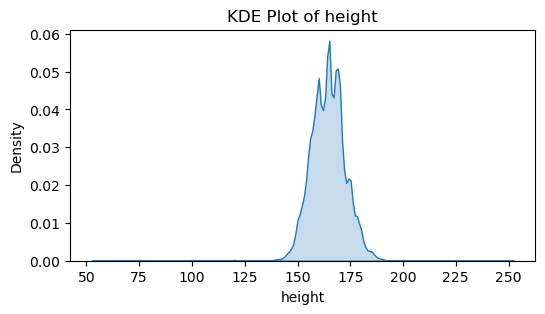

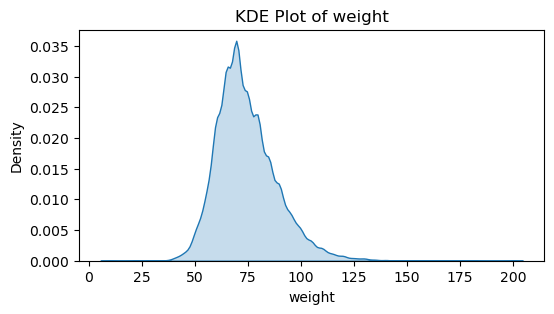

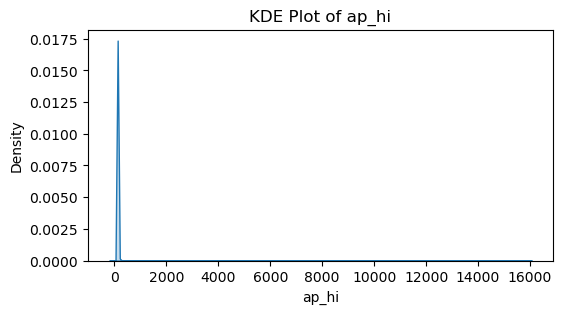

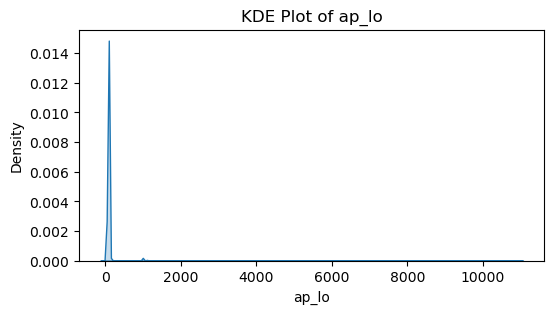

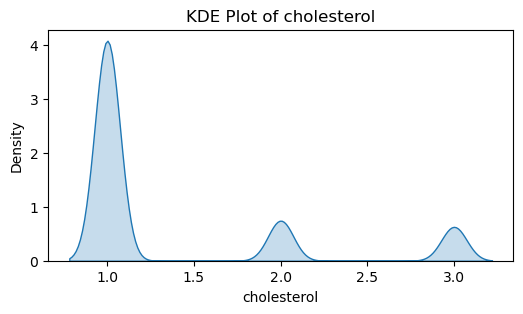

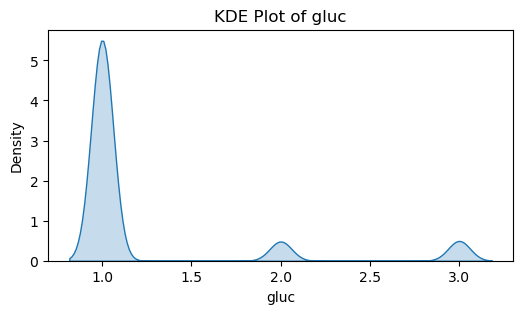

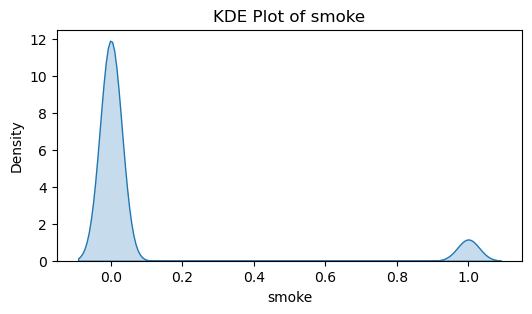

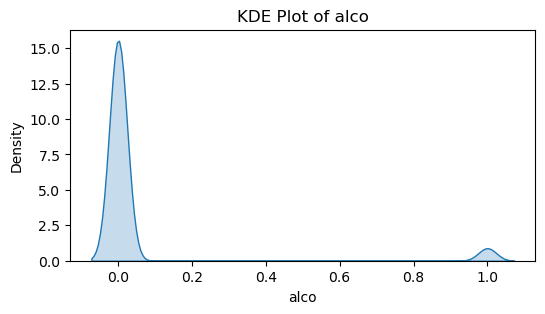

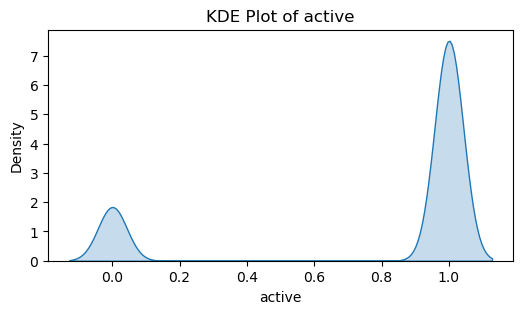

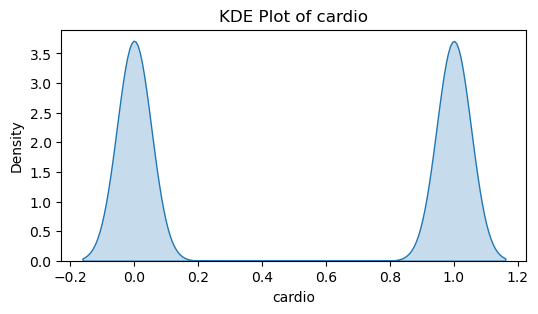

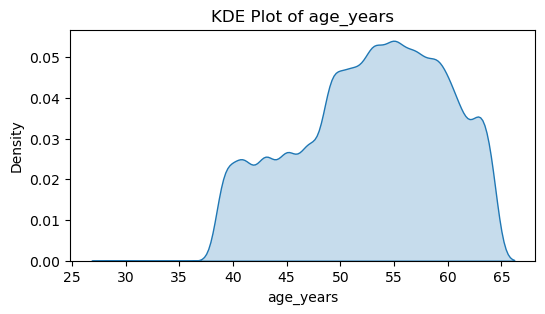

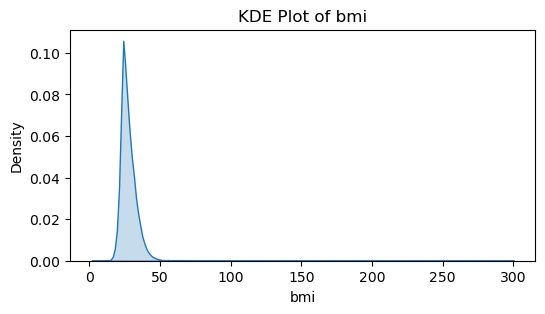

In [18]:
for col in df:
        plt.figure(figsize=(6,3))
        sns.kdeplot(df[col], fill=True)
        plt.title(f"KDE Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.show()

# Age Histplot

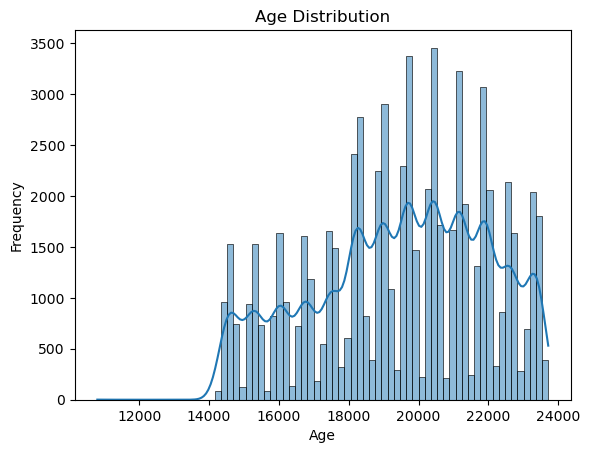

In [19]:
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

 # Clean "ap_lo" and "ap_hi" by removing unreal values
like, 90 <= ap_hi <= 240 and 70 <= ap_lo <= 140 that's the range \
and ap_hi < ap_lo is very unreal

In [20]:
df = df[(df['ap_hi'] >= 70) & (df['ap_hi'] <= 240)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 140)]
df = df[df['ap_hi'] > df['ap_lo']]
df.shape

(68664, 14)

# Heatmap Visualization

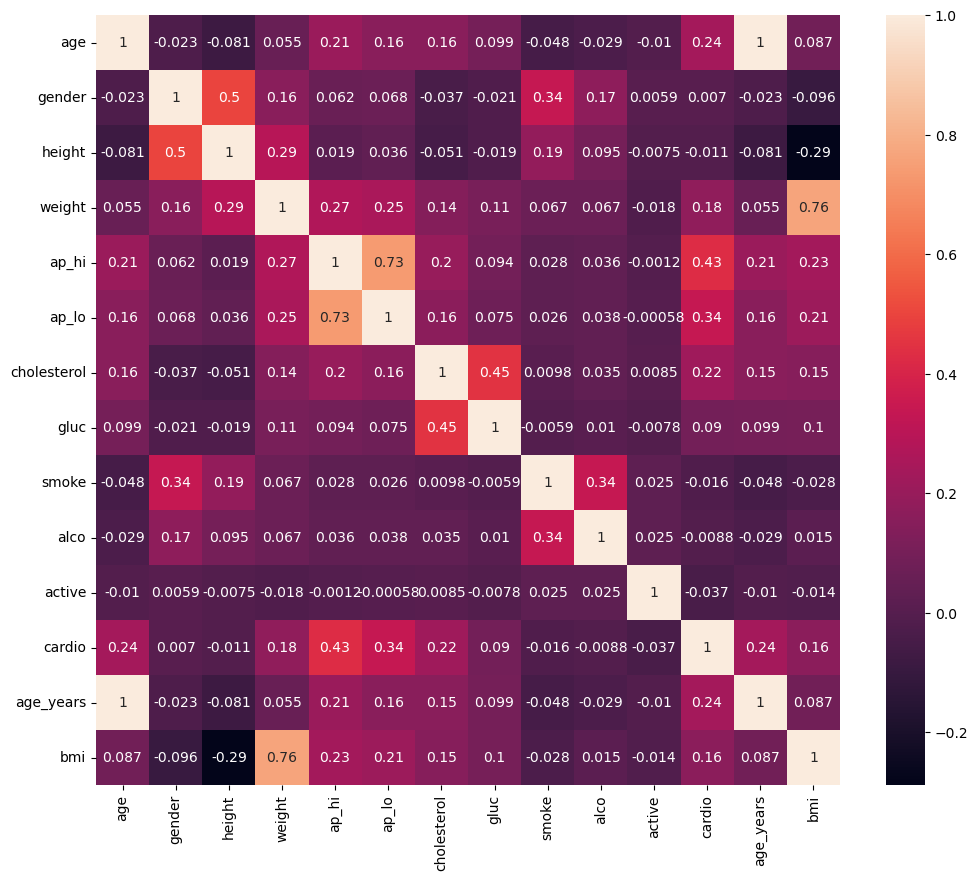

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Identify & Handle Outliers

In [22]:
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower) & (df[column] <= upper)]

# numeric_cols = ['height','weight','ap_hi','ap_lo']

# for col in numeric_cols:
#     df = remove_outliers(df, col)

In [23]:
df.to_csv("preProcessed.csv",index=False)